In [1]:
!pip install fredapi > /dev/null


In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_colwidth', 500)

color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred


In [3]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
fred_key = user_secrets.get_secret("fredapi_key")

# Create the Fred Object

In [4]:
fred = Fred(api_key=fred_key)



# 2. Search for Economic Data

In [5]:
sp_search = fred.search('S&P', order_by='popularity')

In [6]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-07-07,2023-07-07,ICE BofA US High Yield Index Option-Adjusted Spread,1996-12-31,2023-07-06,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-07-07 08:34:08-05:00,94,"The ICE BofA Option-Adjusted Spreads (OASs) are the calculated spreads between a computed OAS index of all bonds in a given rating category and a spot Treasury curve. An OAS index is constructed using each constituent bond's OAS, weighted by market capitalization. The ICE BofA High Yield Master II OAS uses an index of bonds that are below investment grade (those rated BB or below). This data represents the ICE BofA US High Yield Index value, which tracks the performance of US dollar denomina..."
CSUSHPINSA,CSUSHPINSA,2023-07-07,2023-07-07,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-04-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-06-27 08:13:02-05:00,90,"For more information regarding the index, please visit Standard & Poor's (https://www.spglobal.com/spdji/en/documents/methodologies/methodology-sp-corelogic-cs-home-price-indices.pdf). There is more information about home price sales pairs in the Methodology section. Copyright, 2016, Standard & Poor's Financial Services LLC. Reprinted with permission."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-07-07,2023-07-07,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-07-06,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-07-07 08:34:12-05:00,83,"This data represents the effective yield of the ICE BofA US High Yield Index, which tracks the performance of US dollar denominated below investment grade rated corporate debt publicly issued in the US domestic market. To qualify for inclusion in the index, securities must have a below investment grade rating (based on an average of Moody's, S&P, and Fitch) and an investment grade rated country of risk (based on an average of Moody's, S&P, and Fitch foreign currency long term sovereign debt ..."
SP500,SP500,2023-07-07,2023-07-07,S&P 500,2013-07-08,2023-07-06,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-07-06 19:10:50-05:00,82,"The observations for the S&P 500 represent the daily index value at market close. The market typically closes at 4 PM ET, except for holidays when it sometimes closes early. The Federal Reserve Bank of St. Louis and S&P Dow Jones Indices LLC have reached a new agreement on the use of Standard & Poors and Dow Jones Averages series in FRED. FRED and its associated services will include 10 years of daily history for Standard & Poors and Dow Jones Averages series. The S&P 500 is regarded as a ..."
MEHOINUSA672N,MEHOINUSA672N,2023-07-07,2023-07-07,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,81,"Household data are collected as of March. As stated in the Census's Source and Accuracy of Estimates for Income, Poverty, and Health Insurance Coverage in the United States: 2011 (http://www.census.gov/hhes/www/p60_243sa.pdf). Estimation of Median Incomes. The Census Bureau has changed the methodology for computing median income over time. The Census Bureau has computed medians using either Pareto interpolation or linear interpolation. Currently, we are using linear interpolation to estima..."


# Pull raw data

<Axes: title={'center': 'S&P 500'}>

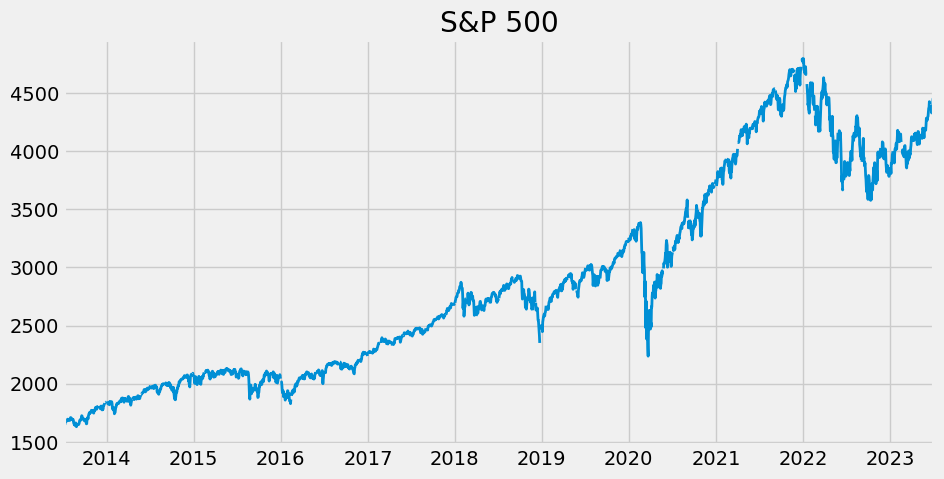

In [7]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10,5), title="S&P 500", lw=2)

In [8]:
# Pull and Join Multiple Data Series

In [9]:
uempl_results = fred.search("unemployment")

In [10]:
unrate = fred.get_series("unrate")

In [11]:
unemp_df = fred.search('unemployment state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]



In [12]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    break